In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 13,6

import seaborn as sns

In [2]:
data = pd.read_csv('HR.csv')
pd.concat([data.describe(), data.mode()])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,NaN,NaN
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN
0,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,sales,low
1,NaN,NaN,NaN,156.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.corr(method='spearman')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


In [40]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
employees = data.loc[data.left == 0]

employees_department = employees.pivot_table(columns = 'department', values = 'left', aggfunc ='count', 
                   fill_value = 0)

employees_department


department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,954,666,563,524,539,655,704,3126,1674,2023


Text(0.5, 1.0, 'Salary')

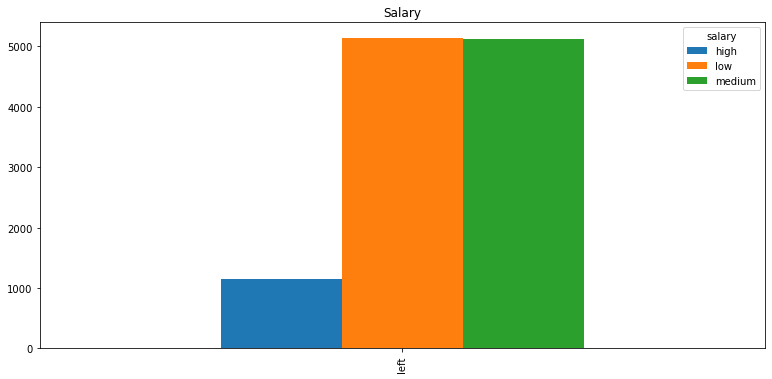

In [12]:
salary = employees.pivot_table(columns = 'salary', values = 'left', aggfunc ='count', 
                   fill_value = 0).plot(kind = 'bar')
plt.title('Salary')


Text(0, 0.5, 'Count employees')

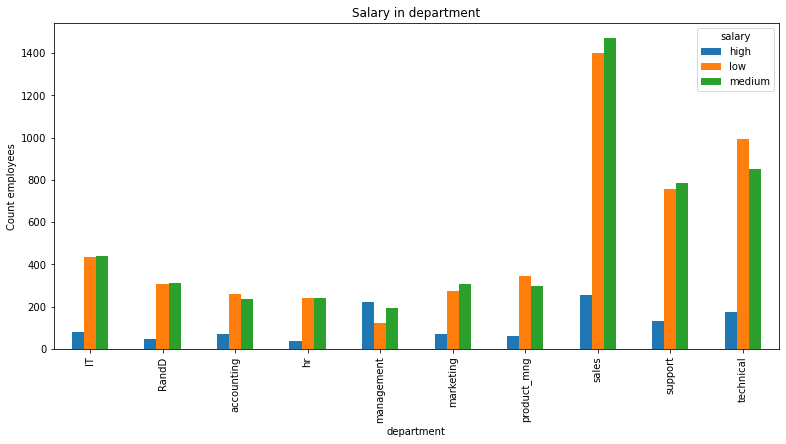

In [8]:
salary_depart = employees.pivot_table(index = 'department', columns = 'salary', values = 'left', aggfunc ='count', 
                   fill_value = 0).plot(kind='bar')
plt.title('Salary in department')
plt.ylabel('Count employees')

Text(0, 0.5, 'Average_montly_hours')

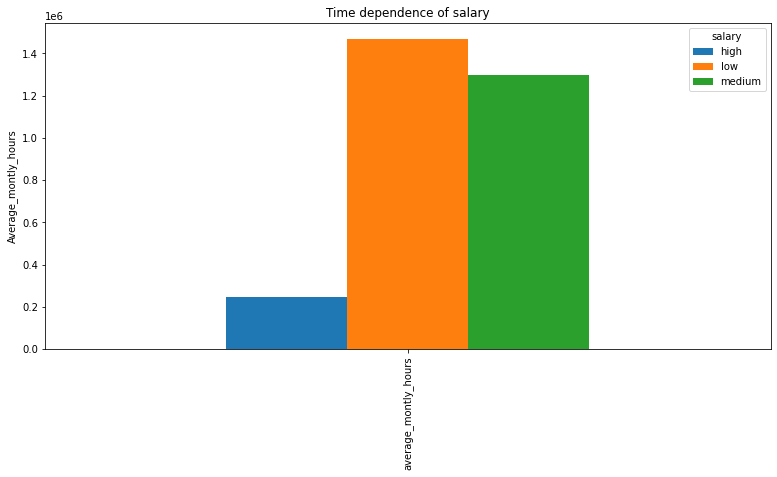

In [10]:
salary_time = data.pivot_table(columns = 'salary', values = 'average_montly_hours', aggfunc ='sum', 
                   fill_value = 0)
salary_time.plot(kind='bar') 
plt.title('Time dependence of salary')
plt.ylabel('Average_montly_hours')

Исходя из графика, гипотеза о том, что сотрудники с большим окладом проводят больше времени на работе не подтверждена. Сотрудники, которые проводят больше времени на работе получчают самый низкий оклад

In [45]:
employees

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [63]:
promotion = employees.loc[employees['promotion_last_5years'] == 1]
a = promotion['promotion_last_5years'].count() / employees['promotion_last_5years'].count()*100
print (f'Доля действующих сотрудников с повышением за последние 5 лет: {round(a,2)}')

Доля действующих сотрудников с повышением за последние 5 лет: 2.63


In [64]:
promotion_left = data.loc[(data['promotion_last_5years'] == 1) & (data['left'] == 1)]
lefts = data.loc[data['left'] == 1]

b = promotion_left['promotion_last_5years'].count() / lefts['promotion_last_5years'].count()*100
print (f'Доля уволившихся сотрудников с повышением за последние 5 лет: {round(b,2)}')

Доля уволившихся сотрудников с повышением за последние 5 лет: 0.53


In [66]:
q = employees['satisfaction_level'].sum() / employees['left'].count()

print(f'Средняя степень удовлетворенности среди действуюищх сотрудников: {round(q,2)}')


Средняя степень удовлетворенности среди действуюищх сотрудников: 0.67


In [67]:
d = lefts['satisfaction_level'].sum() / lefts['left'].count()

print(f'Средняя степень удовлетворенности среди уволившихся сотрудников: {round(d,2)}')


Средняя степень удовлетворенности среди уволившихся сотрудников: 0.44


In [68]:
co = employees['number_project'].sum() / employees['left'].count()

print(f'Среднее количество проектов у текущих сотрудников: {round(co,2)}')

Среднее количество проектов у текущих сотрудников: 3.79


In [69]:
le = lefts['number_project'].sum() / lefts['left'].count()

print(f'Среднее количество проектов у уволившихся сотрудников: {round(le,2)}')

Среднее количество проектов у уволившихся сотрудников: 3.86
